**Pre-Requisites**
=======================================================

**Dependencies**
-------------

In [2]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [57 lines of output]
      /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/setuptools/dist.py:458: SetuptoolsDeprecationWarning: Invalid dash-separated options
      !!
      
              ********************************************************************************
              Usage of dash-separated 'description-file' will not be supported in future
              versions. Please use the underscore name 'description_file' instead.
      
              By 2024-Sep-26, you need to update your project and remove deprecated calls
              or your builds will no longer be supported.
      
              See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
              ******************

In [3]:
!pip install pandas matplotlib seaborn

In [14]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 136.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl-fft 1.3.10 requires mkl, which is not installed.
hdijupyterutils 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.0 which is incompatible.
sagemaker 2.229.0 requires numpy<2.0,>=1.9.0, but you have numpy 2.1.0 which is incompatible.
sparkmagic 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.2 which is

In [23]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.3 MB/s eta 0:00:00


**Imports**
-------------

In [4]:
import os
import json

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.22.4)
  from scipy.stats import gaussian_kde


**Exploratory Data Analysis (EDA) for Fraud Detection**
=======================================================

**Data Sets**
-------------

In this project, we explore various datasets related to fraud detection across different financial domains. Each dataset presents unique challenges and opportunities for analysis, making them valuable for understanding and developing fraud detection systems. Below are the datasets currently included in this project:

### 1\. **PaySim Mobile Money Transaction Dataset**

*   **Source**: [Kaggle - PaySim1](https://www.kaggle.com/datasets/ealaxi/paysim1)
    
*   **Description**: Simulated mobile money transactions based on real-world financial data. It includes a large number of transactions with a small fraction labeled as fraud, ideal for exploring imbalanced data and anomaly detection in mobile financial services.
    
*   **Key Features**: Transaction types (e.g., payment, transfer), transaction amounts, timestamps, fraud labels.
    
*   **Challenges**: Handling imbalanced data, detecting anomalies in transaction sequences.
    

### 2\. **Credit Card Approval Prediction Dataset**

*   **Source**: [Kaggle - Credit Card Approval Prediction](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction)
    
*   **Description**: Contains features relevant to credit card approval decisions, including personal and financial information, useful for understanding feature interactions and the effects of categorical and numerical data on fraud prediction models.
    
*   **Key Features**: Personal demographics, financial data (e.g., income, credit score), application status.
    
*   **Challenges**: Balancing categorical and numerical data, addressing feature interactions and high dimensionality.
    

### 3\. **Banking Dataset - Marketing Targets**

*   **Source**: [Kaggle - Banking Dataset Marketing Targets](https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets)
    
*   **Description**: Focuses on direct marketing campaigns of a banking institution, including customer information and campaign outcomes, which can be leveraged to predict customer responses and detect anomalies in marketing-related fraud.
    
*   **Key Features**: Customer demographics, campaign details, response to marketing efforts.
    
*   **Challenges**: Handling large volumes of categorical data, analyzing dynamic customer behavior over time.
    

### 4\. **Loan Prediction Dataset**

*   **Source**: [Kaggle - Loan Prediction Based on Customer Behavior](https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior?select=Training+Data.csv)
    
*   **Description**: Provides information on customer loan applications, including details about the applicants and whether their loans were approved, valuable for exploring the correlation between customer behavior and loan approval, and identifying fraudulent loan applications.
    
*   **Key Features**: Customer demographics and income, loan application details, loan status.
    
*   **Challenges**: Analyzing correlated features, addressing label noise in approved vs. rejected applications.
    

### 5\. **Vehicle Claim Fraud Detection Dataset**

*   **Source**: [Kaggle - Vehicle Claim Fraud Detection](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection)
    
*   **Description**: Centered around vehicle insurance claims with the objective of identifying fraudulent claims, includes a variety of features related to the claims and vehicles involved, ideal for studying noisy data and detecting fraudulent patterns.
    
*   **Key Features**: Claim details (e.g., claim amount, date), vehicle information, fraud labels.
    
*   **Challenges**: Dealing with noisy and possibly encrypted data, identifying patterns in categorical and numerical data.

In [6]:
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser('~/.kaggle')

datasets = {
    "paysim1": "ealaxi/paysim1",
    "credit_card_approval_prediction": "rikdifos/credit-card-approval-prediction",
    "banking_dataset_marketing_targets": "prakharrathi25/banking-dataset-marketing-targets",
    "loan_prediction": "subhamjain/loan-prediction-based-on-customer-behavior",
    "vehicle_claim_fraud_detection": "shivamb/vehicle-claim-fraud-detection"
}

base_dir = "datasets"

if not os.path.exists(base_dir):
    os.makedirs(base_dir)

def download_and_unzip_dataset(dataset_name, dataset_path):
    dataset_dir = os.path.join(base_dir, dataset_name)
    if not os.path.exists(dataset_dir):
        os.makedirs(dataset_dir)
    os.system(f"kaggle datasets download -d {dataset_path} -p {dataset_dir} --unzip")
    print(f"Downloaded and extracted {dataset_name} dataset to {dataset_dir}")

for name, path in datasets.items():
    download_and_unzip_dataset(name, path)

print("Downloaded datasets and their contents:")
for dataset_name in datasets.keys():
    dataset_dir = os.path.join(base_dir, dataset_name)
    print(f"\nContents of {dataset_name}:")
    print(os.listdir(dataset_dir))

Downloaded and extracted paysim1 dataset to datasets/paysim1
Downloaded and extracted credit_card_approval_prediction dataset to datasets/credit_card_approval_prediction
Downloaded and extracted banking_dataset_marketing_targets dataset to datasets/banking_dataset_marketing_targets
Downloaded and extracted loan_prediction dataset to datasets/loan_prediction
Downloaded and extracted vehicle_claim_fraud_detection dataset to datasets/vehicle_claim_fraud_detection
Downloaded datasets and their contents:

Contents of paysim1:
['PS_20174392719_1491204439457_log.csv']

Contents of credit_card_approval_prediction:
['credit_record.csv', 'application_record.csv']

Contents of banking_dataset_marketing_targets:
['.ipynb_checkpoints', 'train.csv', 'test.csv']

Contents of loan_prediction:
['Test Data.csv', 'Sample Prediction Dataset.csv', 'Training Data.csv']

Contents of vehicle_claim_fraud_detection:
['fraud_oracle.csv']


sh: kaggle: command not found
sh: kaggle: command not found
sh: kaggle: command not found
sh: kaggle: command not found
sh: kaggle: command not found


In [9]:
dataset_path_1 = "../analytics/datasets/paysim1/PS_20174392719_1491204439457_log.csv"
df_1 = pd.read_csv(dataset_path_1)
df_1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Common Aspects of Fraud Data**
--------------------

Fraud data typically has several unique characteristics that make it challenging to analyze and detect fraudulent activities. Understanding these common aspects is crucial when performing Exploratory Data Analysis (EDA) and developing fraud detection models.

### 1\. **Imbalanced Data**

In fraud detection, one of the most common challenges is the imbalance between the number of fraudulent and non-fraudulent transactions. Typically, the number of legitimate transactions far exceeds the number of fraudulent ones, which can lead to biased models that favor the majority class. This imbalance can skew the performance of machine learning models, making it essential to use techniques like resampling, SMOTE, or cost-sensitive learning to handle the imbalance.

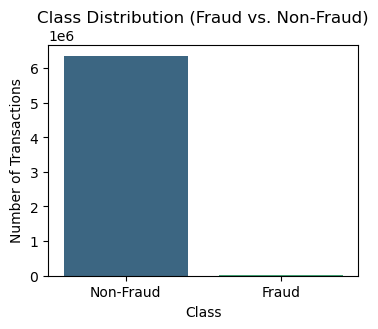

Class Distribution (Percentages):
isFraud
0    99.870918
1     0.129082
Name: count, dtype: float64
Class Distribution (Counts):
isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [10]:
class_distribution = df_1['isFraud'].value_counts()

plot_data = df_1['isFraud'].value_counts().reset_index()
plot_data.columns = ['isFraud', 'count']

plt.figure(figsize=(4,3))
sns.barplot(x='isFraud', y='count', hue='isFraud', data=plot_data, palette='viridis', dodge=False, legend=False)
plt.title('Class Distribution (Fraud vs. Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

print("Class Distribution (Percentages):")
print(class_distribution / len(df_1) * 100)


print("Class Distribution (Counts):")
print(df_1['isFraud'].value_counts())

This plot shows the stark difference in the number of non-fraudulent vs. fraudulent transactions. Typically, fraudulent transactions constitute a very small percentage of the overall data. Data imbalance can lead to several issues in model training:

*   **Biased Predictions**: The model may be biased towards predicting the majority class (non-fraudulent transactions), leading to poor detection of fraud.
    
*   **Poor Recall for Fraud**: While the overall accuracy might seem high, the recall (ability to correctly identify fraud cases) will likely be low.
    

To address these challenges, it's important to consider strategies such as:

1.   **Resampling**: Techniques like oversampling the minority class (e.g., using SMOTE) or undersampling the majority class to balance the data.

In [11]:
from sklearn.utils import resample

df_1_majority = df_1[df_1['isFraud']==0]
df_1_minority = df_1[df_1['isFraud']==1]

Class Distribution After Undersampling:
isFraud
1    8213
0    8213
Name: count, dtype: int64


/tmp/ipykernel_12039/759770370.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_1_downsampled['isFraud'].value_counts().index,


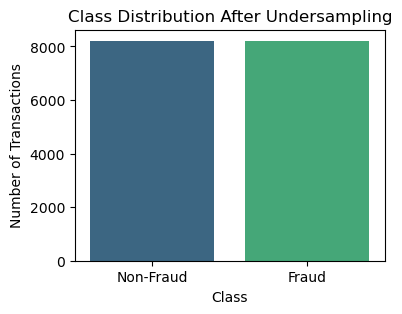

In [11]:
df_1_majority_downsampled = resample(df_1_majority, 
                                   replace=False,    
                                   n_samples=len(df_1_minority), 
                                   random_state=42)

df_1_downsampled = pd.concat([df_1_minority, df_1_majority_downsampled])
print("Class Distribution After Undersampling:")
print(df_1_downsampled['isFraud'].value_counts())

plt.figure(figsize=(4, 3))
sns.barplot(x=df_1_downsampled['isFraud'].value_counts().index, 
            y=df_1_downsampled['isFraud'].value_counts().values, palette='viridis')
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

Class Distribution after Upsampling:
isFraud
0    6354407
1    6354407
Name: count, dtype: int64


/tmp/ipykernel_12039/3140896713.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_1_upsampled['isFraud'].value_counts().index,


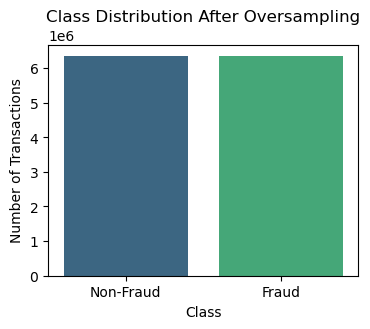

In [12]:
df_1_minority_upsampled = resample(df_1_minority,
                                   replace=True,
                                   n_samples=len(df_1_majority),
                                   random_state=42)
df_1_upsampled = pd.concat([df_1_majority, df_1_minority_upsampled])

print("Class Distribution after Upsampling:")
print(df_1_upsampled['isFraud'].value_counts())

plt.figure(figsize=(4,3))
sns.barplot(x=df_1_upsampled['isFraud'].value_counts().index,
            y=df_1_upsampled['isFraud'].value_counts().values, palette='viridis')
plt.title("Class Distribution After Oversampling")
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks([0,1],['Non-Fraud','Fraud'])
plt.show()

Both undersampling and oversampling can be effective in balancing the dataset, but they come with trade-offs. Undersampling can lead to a loss of information, while oversampling can lead to overfitting. We can therefore consider more advanced techniques: like SMOTE (Synthetic Minority Over-sampling Technique) by generating synthetic examples of the minority class. This helps balance the class distribution without losing any data from the majority class or risking overfitting as much as traditional oversampling.

In [24]:
from imblearn.over_sampling import SMOTE
import category_encoders as ce
from sklearn.model_selection import train_test_split

X = df_1.drop('isFraud', axis=1)
Y = df_1['isFraud']

'''SMOTE cannot handle categorical data so we need to encode it. Given this dataset is too
large we will opt for Target Encoding (Mean Encoding) instead of One Hot Encoding. Now
ideally Target Encoding requires various additionally steps such as smoothing, adding noise,
handling rare categories, cross-validation within each fold etc. to prevent over-fitting.'''

categorical_cols = X.select_dtypes(include=['object']).columns
target_encoder = ce.TargetEncoder(cols=categorical_cols)
X_encoded = target_encoder.fit_transform(X,Y)

X_encoded.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,0.000000,9839.64,0.001123,170136.0,160296.36,0.001123,0.0,0.0,0
1,1,0.000000,1864.28,0.001123,21249.0,19384.72,0.001123,0.0,0.0,0
2,1,0.007688,181.00,0.131231,181.0,0.00,0.020944,0.0,0.0,0
3,1,0.001840,181.00,0.131231,181.0,0.00,0.021870,21182.0,0.0,0
4,1,0.000000,11668.14,0.001123,41554.0,29885.86,0.001123,0.0,0.0,0


Class Distribution After SMOTE:
isFraud
0    4448085
1    4448085
Name: count, dtype: int64


/tmp/ipykernel_12039/1854698258.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.Series(Y_train_smote).value_counts().index,


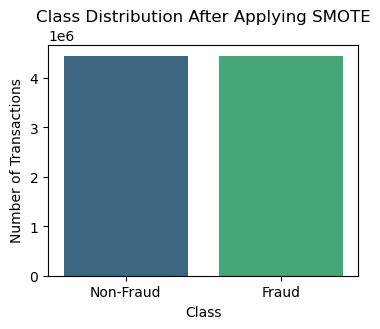

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.3, random_state=42, stratify=Y)

smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

print("Class Distribution After SMOTE:")
print(pd.Series(Y_train_smote).value_counts())

plt.figure(figsize=(4,3))
sns.barplot(x=pd.Series(Y_train_smote).value_counts().index,
            y=pd.Series(Y_train_smote).value_counts().values, palette='viridis')
plt.title('Class Distribution After Applying SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

Some other options for handling imbalanced data during training would be to:

*   **Class Weights**: Assigning higher weights to the minority class during model training to make the model pay more attention to the minority class.
    
*   **Ensemble Methods**: Using ensemble techniques that are better suited for imbalanced data.

*   **High Dimensionality**
    
    *   **Numerous Features:** Fraud detection datasets often have many features, including transaction details, customer demographics, behavioral data, etc. This can make the analysis complex and may require dimensionality reduction techniques.
        
    *   **Sparse Data:** Despite having many features, not all features may be relevant or populated for every transaction, leading to sparse data.
        
*   **Anomalous Patterns**
    
    *   **Outliers:** Fraud data often contains outliers that do not conform to the usual pattern of legitimate transactions. These outliers might be in terms of transaction amount, frequency, or location.
        
    *   **Behavioral Anomalies:** Changes in user behavior, such as sudden spending spikes or transactions from unusual locations, are common indicators of fraud.
        
*   **Correlated Features**
    
    *   **Feature Correlation:** Many features in fraud data might be correlated. For instance, the time and amount of transactions could be correlated with fraudulent activity.
        
    *   **Multicollinearity:** High correlation among independent variables can complicate the analysis and model building, requiring techniques like PCA or VIF to address multicollinearity.
        
*   **Noisy Data**
    
    *   **Data Quality Issues:** Fraud data often comes with a lot of noise, such as incorrect data entries, missing values, or irrelevant features, which can obscure the detection of fraudulent activities.
        
    *   **Need for Preprocessing:** Extensive data cleaning and preprocessing are usually required to handle noise and improve data quality.
        
*   **Feature Interactions**
    
    *   **Complex Relationships:** Fraud detection often involves complex interactions between features, such as the relationship between transaction amount, location, and time.
        
    *   **Derived Features:** Feature engineering, such as creating ratio features, aggregating transactions over time, or calculating user-specific metrics, is crucial to capture these interactions.
        
*   **Dynamic Behavior**
    
    *   **Evolving Fraud Techniques:** Fraudsters often change their tactics, leading to changes in the patterns of fraudulent activities over time. This necessitates continuous monitoring and updating of detection models.
        
    *   **Concept Drift:** The underlying distribution of fraud data may change over time, known as concept drift, which requires adaptive models and continuous learning.
        
*   **Anonymized or Encrypted Data**
    
    *   **Data Privacy:** Fraud datasets, especially in industries like finance, often anonymize or encrypt sensitive features like customer IDs or transaction details to protect privacy. This can make it challenging to directly analyze and interpret the data.
        
    *   **Limited Feature Set:** Due to privacy concerns, certain potentially informative features may not be available, necessitating more creative feature engineering.
        
*   **Categorical Data**
    
    *   **Categorical Variables:** Fraud data often contains categorical features such as transaction type, location, or customer segment. These need to be carefully encoded and analyzed to detect patterns.
        
    *   **High Cardinality:** Some categorical variables may have high cardinality (e.g., many unique values), which can complicate analysis and model training.
        
*   **Multiple Data Sources**
    
    *   **Heterogeneous Data:** Fraud detection often involves combining data from multiple sources, such as transaction logs, customer profiles, and external data like geolocation or IP addresses.
        
    *   **Data Integration Challenges:** Integrating these diverse data sources can be challenging due to differences in formats, granularity, and quality.
        
*   **Label Noise**
    
    *   **Incorrect Labels:** In fraud datasets, there might be instances where fraudulent transactions are mislabeled as legitimate and vice versa, leading to label noise.
        
    *   **Impact on Model Training:** Label noise can significantly impact the performance of machine learning models, making it crucial to apply techniques to identify and correct mislabeled data.